<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from typing import Tuple
from typing import Optional

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [97]:
#ваш код здесь

df = pd.read_csv("dst-3.0_16_1_hh_database.csv", encoding="utf-8", sep=";")

print(f"Исходная таблица: {df.shape[0]} строк.")

Исходная таблица: 44744 строк.


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [98]:
#ваш код здесь

df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [100]:
#ваш код здесь

df.count()

Пол, возраст                       44744
ЗП                                 44744
Ищет работу на должность:          44744
Город, переезд, командировки       44744
Занятость                          44744
График                             44744
Опыт работы                        44576
Последнее/нынешнее место работы    44743
Последняя/нынешняя должность       44742
Образование и ВУЗ                  44744
Обновление резюме                  44744
Авто                               44744
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [101]:
#ваш код здесь

df.describe(include='all').T

,count,unique,top,freq
"Пол, возраст",44744,16003,"Мужчина , 32 года , родился 17 сентября 1986",18
ЗП,44744,690,50000 руб.,4064
Ищет работу на должность:,44744,14929,Системный администратор,3099
"Город, переезд, командировки",44744,10063,"Москва , не готов к переезду , не готов к кома...",1261
Занятость,44744,38,полная занятость,30026
График,44744,47,полный день,22727
Опыт работы,44576,44413,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,3
Последнее/нынешнее место работы,44743,30214,Индивидуальное предпринимательство / частная п...,935
Последняя/нынешняя должность,44742,16927,Системный администратор,2062
Образование и ВУЗ,44744,40148,Высшее образование 2014 Тюменский Государствен...,4


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [102]:
#ваш код здесь

# Преобразование столбца «Образование и ВУЗ» в новый столбец «Образование»
def categorize_education(text):
    """
     Классифицирует уровень образования на основе входной строки.
    
     Parameters:
     - text (str): строка об образовании и университете (например, «Высшее образование 2016 Московский авиационный институт»).
    
     Returns:
     - str: Классифицированный уровень образования («высшее», «неоконченное высшее», «среднее специальное», «среднее»).
     """
    first_two_words = text.split()[:2]  # Берём первые два слова
    if 'Высшее' in first_two_words:
        return 'высшее'
    elif 'Неоконченное' in first_two_words:
        return 'неоконченное высшее'
    elif 'Среднее' in first_two_words and 'специальное' in first_two_words:
        return 'среднее специальное'
    elif 'Среднее' in first_two_words:
        return 'среднее'
    else:
        return 'неизвестное'  # Для обработки неожиданного формата

df['Образование'] = df['Образование и ВУЗ'].apply(categorize_education)

# Удаление столбца «Образование и ВУЗ»
df.drop(columns=['Образование и ВУЗ'], inplace=True)

# Проверим, какие уникальные значения в новом столбце
print(f"Категории образования: {df['Образование'].unique()}")

# Количество соискателей с «средним» уровнем образования
count_middle = df[df['Образование'] == 'среднее'].shape[0]
print(f"Количество соискателей с средним уровнем образования (школьное образование): {count_middle}")

Категории образования: ['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']
Количество соискателей с средним уровнем образования (школьное образование): 559


In [103]:
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [104]:
#ваш код здесь

def extract_gender_age(text: str) -> Tuple[str, int]:
    """
    Извлекает пол и возраст из строки в формате: <Пол>, <Возраст>.

    Parameters:
    - text (str): Строка с полом, возрастом и датой рождения.

    Куегкты:
    - Tuple[str, int]: Кортеж с полом ('М' для мужчины, 'Ж' для женщины) и возрастом (целое число).
    """
    # Словарь для преобразования пола
    gender_map = {'Мужчина': 'М', 'Женщина': 'Ж'}
    
    try:
        # Разделяем строку по запятой
        parts = text.split(' , ')
        
        # Извлекаем пол с помощью словаря
        gender = gender_map.get(parts[0], 'Неизвестно')
        
        # Используем регулярное выражение для извлечения возраста (число перед "лет")
        age = int(re.search(r'(\d+)', parts[1]).group(1))
        
        return gender, age
    except Exception as e:
        # Обрабатываем ошибки (неправильный формат или отсутствие данных)
        print(f"Ошибка при обработке '{text}': {e}")
        return 'Неизвестно', 0  # Возвращаем значения по умолчанию в случае ошибки

# Применяем функцию к столбцу
df[['Пол', 'Возраст']] = df['Пол, возраст'].apply(lambda x: pd.Series(extract_gender_age(x)))

# Удаляем исходный столбец «Пол, возраст»
df.drop(columns=['Пол, возраст'], inplace=True)

# Рассчитываем средний возраст
average_age = df['Возраст'].mean()
print(f"Средний возраст соискателей: {average_age:.1f} лет")

# Рассчитываем процент женских резюме
percentage_women = df[df['Пол'] == 'Ж'].shape[0] / df.shape[0] * 100
print(f"Процент женских резюме: {percentage_women:.2f}%")

Средний возраст соискателей: 32.2 лет
Процент женских резюме: 19.07%


In [105]:
df.head()

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [106]:
#ваш код здесь

def convert_experience_to_months(experience_text: Optional[str]) -> Optional[float]:
    """
    Преобразует текстовый опыт работы в количество месяцев.
    
    Параметры:
    - experience_text (str): Текстовый опыт работы соискателя.
    
    Возвращает:
    - float или NaN: Общее количество месяцев опыта работы, или NaN, если данные не указаны.
    """
    # Если "Не указано" или пропуск, возвращаем NaN
    if pd.isna(experience_text) or experience_text == "Не указано":
        return np.nan
    
    # Оставляем только первую часть до запятой, если есть информация о других компаниях
    experience_text = experience_text.split(',')[0]
    
    # Регулярные выражения для извлечения лет и месяцев
    years_match = re.search(r'(\d+)\s*(год|года|лет)', experience_text)
    months_match = re.search(r'(\d+)\s*(месяц|месяца|месяцев)', experience_text)
    
    # Инициализация переменных
    years = 0
    months = 0
    
    # Извлекаем количество лет, если есть
    if years_match:
        years = int(years_match.group(1))
    
    # Извлекаем количество месяцев, если есть
    if months_match:
        months = int(months_match.group(1))
    
    # Переводим в месяцы и возвращаем
    total_months = years * 12 + months
    return total_months


# Применяем функцию к столбцу «Опыт работы»
df['Опыт работы (месяц)'] = df['Опыт работы'].apply(convert_experience_to_months)

# Удаляем исходный столбец «Опыт работы»
df.drop(columns=['Опыт работы'], inplace=True)

# Рассчитываем медианный опыт работы (в месяцах)
median_experience = df['Опыт работы (месяц)'].median()
print(f"Медианный опыт работы (в месяцах): {median_experience:.0f}")

Медианный опыт работы (в месяцах): 100


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [107]:
#ваш код здесь

# Список городов-миллионников
million_cities = [
    'Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 
    'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
]


def extract_city(text: str) -> str:
    """
    Функция проверяет, содержит ли строка хотя бы одно из указанных ключевых слов, 
    указывающих на готовность кандидата к определенному действию (переезд, командировки и т.д.).

    Параметры:
    text (str): строка, содержащая информацию о готовности.
    keywords (list): список ключевых слов или фраз для поиска.

    Возвращает:
    bool: True, если строка содержит хотя бы одно из ключевых слов, иначе False.
    """
    if pd.isna(text) or text.strip() == "":
        return 'другие'
    
    if 'Москва' in text:
        return 'Москва'
    elif 'Санкт-Петербург' in text:
        return 'Санкт-Петербург'
    
    for city in million_cities:
        if city in text:
            return 'город-миллионник'
    
    return 'другие'


def extract_relocation(text: str) -> bool:
    """
    Функция извлекает информацию о готовности кандидата к переезду.
    Проверяет наличие фраз, указывающих на готовность или нежелание переехать.

    Параметры:
    text (str): строка, содержащая информацию о готовности к переезду.

    Возвращает:
    bool: True, если кандидат готов переехать, иначе False.
    """
    if re.search(r'не готова к переезду', text) or re.search(r'не готов к переезду', text):
        return False
    elif re.search(r'готов к переезду', text) or re.search(r'готова к переезду', text) or re.search(r'хочу переехать', text):
        return True
    # по умолчанию считаем, что не готов к переезду
    return False  


def extract_travel(text: str) -> bool:
    """
    Функция извлекает информацию о готовности кандидата к командировкам.
    Проверяет наличие фраз, указывающих на готовность или нежелание к командировкам.

    Параметры:
    text (str): строка, содержащая информацию о готовности к командировкам.

    Возвращает:
    bool: True, если кандидат готов к командировкам, иначе False.
    """
    if re.search(r'не готова к командировкам', text) or re.search(r'не готов к командировкам', text):
        return False
    elif re.search(r'готова к командировкам', text) or re.search(r'готова к редким командировкам', text):
        return True
    elif re.search(r'готов к командировкам', text) or re.search(r'готов к редким командировкам', text):
        return True
    # по умолчанию считаем, что не готов к командировкам
    return False  

# Применяем функции к столбцу
df['Город'] = df['Город, переезд, командировки'].apply(extract_city)
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(extract_relocation)
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(extract_travel)

# Удаляем старый столбец
df.drop(columns=['Город, переезд, командировки'], inplace=True)

# Рассчитываем процент соискателей, которые живут в Санкт-Петербурге
spb_percentage = df[df['Город'] == 'Санкт-Петербург'].shape[0] / df.shape[0] * 100
spb_percentage = round(spb_percentage)

# Выводим результат
print(f"Процент соискателей, которые живут в Санкт-Петербурге: {spb_percentage}%")

# Рассчитываем процент соискателей, готовых одновременно и к переезду, и к командировкам
relocation_and_travel_percentage = df[(df['Готовность к переезду'] == True) & (df['Готовность к командировкам'] == True)].shape[0] / df.shape[0] * 100
relocation_and_travel_percentage = round(relocation_and_travel_percentage)

# Выводим результат
print(f"Процент соискателей, готовых одновременно и к переезду, и к командировкам: {relocation_and_travel_percentage}%")

Процент соискателей, которые живут в Санкт-Петербурге: 11%
Процент соискателей, готовых одновременно и к переезду, и к командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [108]:
#ваш код здесь

# Списки уникальных категорий
employment_categories = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule_categories = ['полный день', 'сменный график', 'гибкий график', 'удалённая работа', 'вахтовый метод']

# Функция для преобразования категориальных данных в One Hot Encoding
def create_one_hot_columns(df, column_name, categories):
    for category in categories:
        df[f'{column_name} - {category}'] = df[column_name].apply(lambda x: category in x)
    return df

# Преобразуем столбцы «Занятость» и «График»
df = create_one_hot_columns(df, 'Занятость', employment_categories)
df = create_one_hot_columns(df, 'График', schedule_categories)

# Удаляем исходные столбцы
df.drop(columns=['Занятость', 'График'], inplace=True)

# Ответим на контрольные вопросы

# Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
project_and_volunteer_count = df[(df['Занятость - проектная работа'] == True) & (df['Занятость - волонтерство'] == True)].shape[0]

# Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
shift_and_vakhov_count = df[(df['График - вахтовый метод'] == True) & (df['График - гибкий график'] == True)].shape[0]

# Выводим результат
print(f"Количество людей, ищущих проектную работу и волонтёрство: {project_and_volunteer_count}")
print(f"Количество людей, желающих работать вахтовым методом и с гибким графиком: {shift_and_vakhov_count}")

Количество людей, ищущих проектную работу и волонтёрство: 436
Количество людей, желающих работать вахтовым методом и с гибким графиком: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [109]:
#ваш код здесь

# Преобразуем дату обновления резюме
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], format='%d.%m.%Y %H:%M').dt.date

# Выделение суммы зарплаты и валюты
df[['ЗП сумма', 'Валюта']] = df['ЗП'].str.extract(r'(\d+)\s*(\w+)')
df['ЗП сумма'] = pd.to_numeric(df['ЗП сумма'], errors='coerce')
# Преобразование названий валют в ISO-кодировку
currency_mapping = {
    'руб': 'RUB',
    'руб.': 'RUB',
    'грн': 'UAH',
    'грн.': 'UAH',
    'USD': 'USD',
    'EUR': 'EUR',
    'белруб': 'BYN',
    'белруб.': 'BYN',
    'бел': 'BYN',
    'KGS': 'KGS',
    'сум': 'UZS',
    'AZN': 'AZN',
    'KZT': 'KZT'
}
df['Валюта'] = df['Валюта'].map(currency_mapping)

# Загрузка данных о курсах валют
currency_df = pd.read_csv('ExchangeRates.csv', parse_dates=['date'])
currency_df['date'] = pd.to_datetime(currency_df['date'], format='%Y.%m.%d').dt.date

# Объединяем данные
merged_df = pd.merge(df, currency_df, how='left', left_on=['Валюта', 'Обновление резюме'], right_on=['currency', 'date'])

# Обработка пропусков в курсе валют
merged_df['close'] = merged_df['close'].fillna(1)
merged_df['proportion'] = merged_df['proportion'].fillna(1)

# Расчет зарплаты в рублях
merged_df['ЗП (руб)'] = merged_df['ЗП сумма'] * merged_df['close'] / merged_df['proportion']
merged_df['ЗП (руб)'] = merged_df['ЗП (руб)'].fillna(0)

# Убираем строки с NaN в зарплате
median_salary = merged_df['ЗП (руб)'].dropna().median() / 1000
# median_salary = merged_df['ЗП руб'][merged_df['ЗП руб'] > 0].median() / 1000
median_salary_rounded = round(median_salary)

# Удаляем исходные столбцы
merged_df.drop(columns=['ЗП', 'ЗП сумма', 'Валюта', 'currency', 'per', 'date', 'time', 'close', 'vol', 'proportion'], inplace=True)
df = merged_df
print(f"Медианная ЗП: {median_salary_rounded} тыс. руб.")

Медианная ЗП: 59 тыс. руб.


C:\Users\KVladimirov\AppData\Local\Temp\ipykernel_2924\663503640.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  currency_df = pd.read_csv('ExchangeRates.csv', parse_dates=['date'])


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

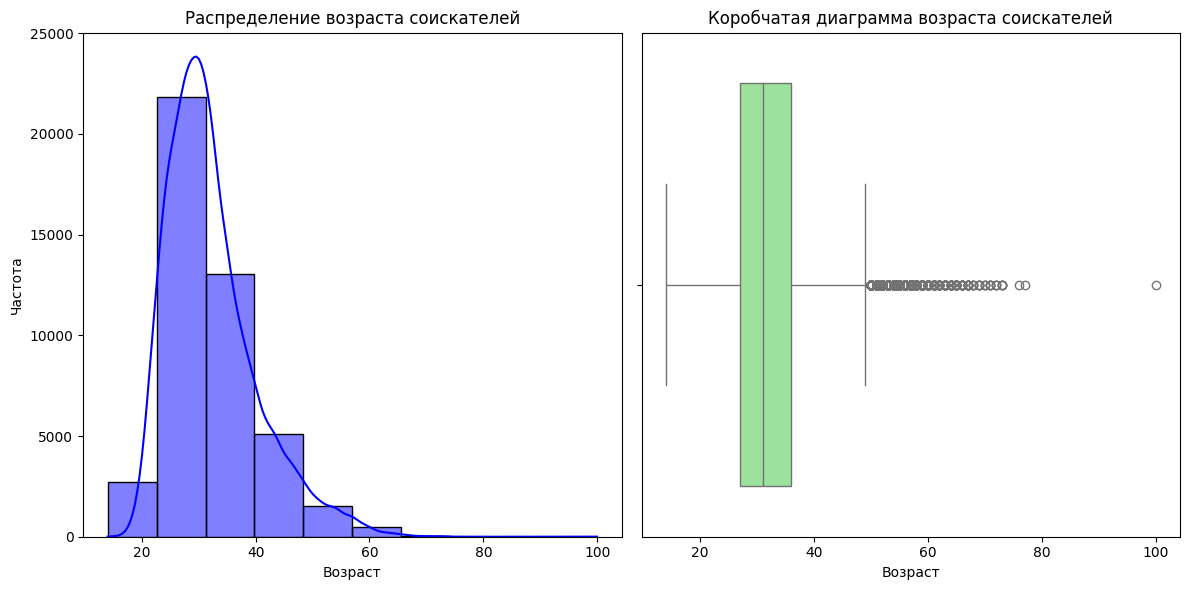

Количество аномалий: 1774
Мода возраста: 30
Минимальный возраст: 14
Максимальный возраст: 100
Интерквартильный размах (IQR): 9.0
Интервал для нормального возраста: (27.0, 36.0)


In [110]:
# ваш код здесь

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Гистограмма для возраста и коробчатая диаграмма
plt.figure(figsize=(12, 6))

# Гистограмма для возраста
plt.subplot(1, 2, 1)
sns.histplot(df['Возраст'], kde=True, color='blue', bins=10)
plt.title('Распределение возраста соискателей')
plt.xlabel('Возраст')
plt.ylabel('Частота')

# Коробчатая диаграмма для возраста
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Возраст'], color='lightgreen')
plt.title('Коробчатая диаграмма возраста соискателей')
plt.xlabel('Возраст')

# Покажем графики
plt.tight_layout()
plt.show()

# Вычисление статистик
mode_age = df['Возраст'].mode()[0]
min_age = df['Возраст'].min()
max_age = df['Возраст'].max()
q1 = df['Возраст'].quantile(0.25)
q3 = df['Возраст'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['Возраст'] < (q1 - 1.5 * iqr)) | (df['Возраст'] > (q3 + 1.5 * iqr))]
print(f"Количество аномалий: {len(outliers)}")

# Вывод статистик
print(f"Мода возраста: {mode_age}")
print(f"Минимальный возраст: {min_age}")
print(f"Максимальный возраст: {max_age}")
print(f"Интерквартильный размах (IQR): {iqr}")
print(f"Интервал для нормального возраста: ({q1}, {q3})")

ваши выводы по графику здесь


- Чему равна мода распределения?


30 лет

- Каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей?


Интервал для нормального возраста: (27.0, 36.0)

- Есть ли аномалии для данного признака? Если есть, то какие значения вы бы причислили к таковым?


Да, есть 1774 аномалий. Аномалиями считается все что находится за пределами 1 и 3 квартиля.


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

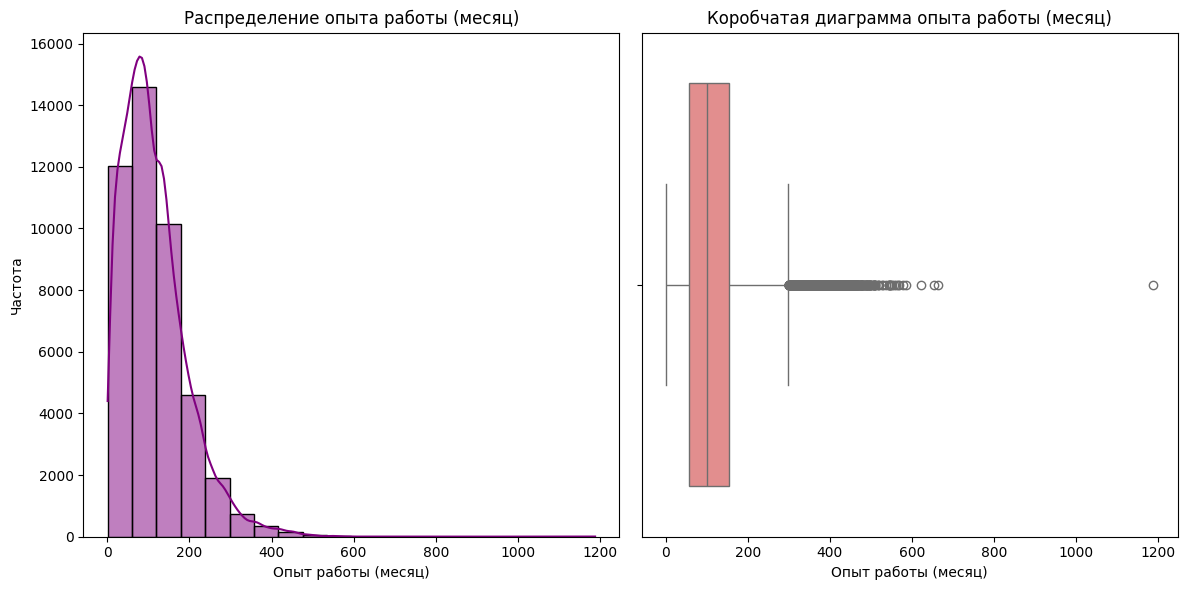

Мода опыта работы: 81.0 месяцев
Минимальный опыт работы: 1.0 месяцев
Максимальный опыт работы: 1188.0 месяцев
Интерквартильный размах (IQR): 97.0 месяцев
Интервал для нормального опыта работы: (57.0, 154.0) месяцев
Количество аномалий: 1276


In [111]:
# ваш код здесь

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Гистограмма для опыта работы в месяцах и коробчатая диаграмма
plt.figure(figsize=(12, 6))

# Гистограмма для опыта работы в месяцах
plt.subplot(1, 2, 1)
sns.histplot(df['Опыт работы (месяц)'], kde=True, color='purple', bins=20)
plt.title('Распределение опыта работы (месяц)')
plt.xlabel('Опыт работы (месяц)')
plt.ylabel('Частота')

# Коробчатая диаграмма для опыта работы
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Опыт работы (месяц)'], color='lightcoral')
plt.title('Коробчатая диаграмма опыта работы (месяц)')
plt.xlabel('Опыт работы (месяц)')

# Покажем графики
plt.tight_layout()
plt.show()

# Вычисление статистик
mode_experience = df['Опыт работы (месяц)'].mode()[0]
min_experience = df['Опыт работы (месяц)'].min()
max_experience = df['Опыт работы (месяц)'].max()
q1_experience = df['Опыт работы (месяц)'].quantile(0.25)
q3_experience = df['Опыт работы (месяц)'].quantile(0.75)
iqr_experience = q3_experience - q1_experience
outliers_experience = df[(df['Опыт работы (месяц)'] < (q1_experience - 1.5 * iqr_experience)) |
                         (df['Опыт работы (месяц)'] > (q3_experience + 1.5 * iqr_experience))]

# Вывод статистик
print(f"Мода опыта работы: {mode_experience} месяцев")
print(f"Минимальный опыт работы: {min_experience} месяцев")
print(f"Максимальный опыт работы: {max_experience} месяцев")
print(f"Интерквартильный размах (IQR): {iqr_experience} месяцев")
print(f"Интервал для нормального опыта работы: ({q1_experience}, {q3_experience}) месяцев")
print(f"Количество аномалий: {len(outliers_experience)}")

ваши выводы здесь

- Чему равна мода распределения?

Мода опыта работы: 81.0 месяцев

- Каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей?

Интервал для нормального опыта работы: (57.0, 154.0) месяцев

- Есть ли аномалии для признака? Если есть, то какие значения вы бы причислили к таковым?

Количество аномалий: 1276, Аномалиями считается все что находится за пределами 1 и 3 квартиля.


3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


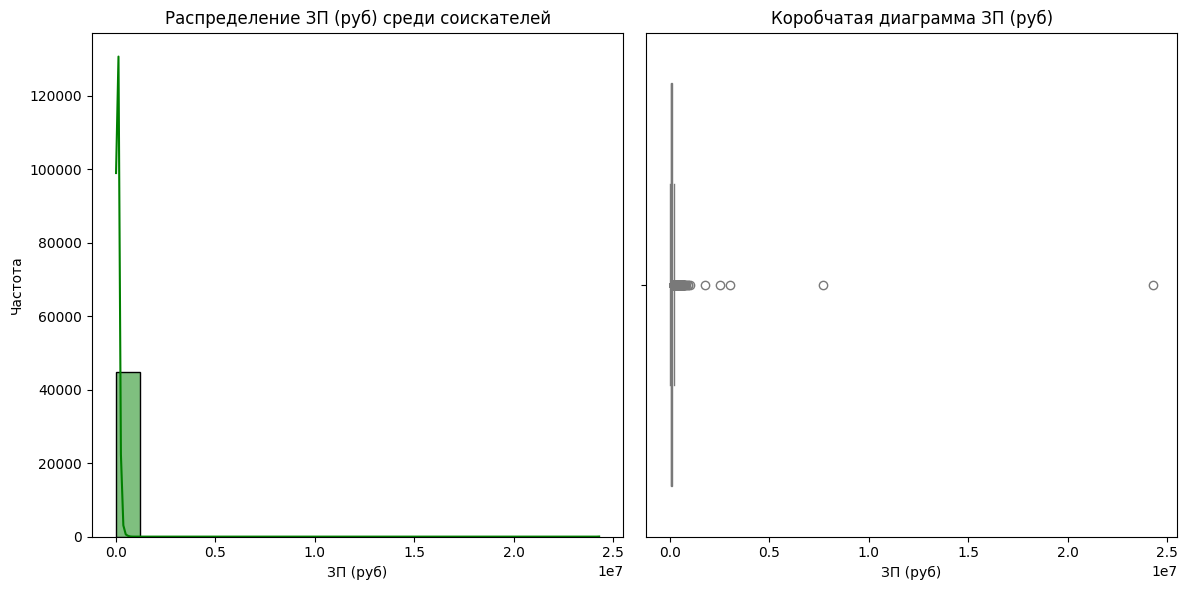

Мода ЗП: 0    50000.0
Name: ЗП (руб), dtype: float64
Минимальная ЗП: 1.0 руб
Максимальная ЗП: 24304876.0 руб
Интерквартильный размах (IQR): 57917.8 руб
Интервал для нормальной ЗП: (37082.2, 95000.0) руб
Аномалии в ЗП:
       ЗП (руб)
6      250000.0
18     260000.0
27     250000.0
84     250000.0
107    350000.0
...         ...
44644  200000.0
44677  200000.0
44683  200000.0
44695  200000.0
44699  220000.0

[2780 rows x 1 columns]
Количество аномалии в ЗП:
2780


In [117]:
# ваш код здесь

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Гистограмма для ЗП (руб) и коробчатая диаграмма
plt.figure(figsize=(12, 6))

# Гистограмма для ЗП (руб)
plt.subplot(1, 2, 1)
sns.histplot(df['ЗП (руб)'], kde=True, color='green', bins=20)
plt.title('Распределение ЗП (руб) среди соискателей')
plt.xlabel('ЗП (руб)')
plt.ylabel('Частота')

# Коробчатая диаграмма для ЗП (руб)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['ЗП (руб)'], color='lightblue')
plt.title('Коробчатая диаграмма ЗП (руб)')
plt.xlabel('ЗП (руб)')

# Покажем графики
plt.tight_layout()
plt.show()

# Вычисление статистик
min_salary = df['ЗП (руб)'].min()
max_salary = df['ЗП (руб)'].max()
q1_salary = df['ЗП (руб)'].quantile(0.25)
q3_salary = df['ЗП (руб)'].quantile(0.75)
iqr_salary = q3_salary - q1_salary
outliers_salary = df[(df['ЗП (руб)'] < (q1_salary - 1.5 * iqr_salary)) |
                     (df['ЗП (руб)'] > (q3_salary + 1.5 * iqr_salary))]

# Вывод статистик
print(f"Мода ЗП: {df['ЗП (руб)'].mode()}")
print(f"Минимальная ЗП: {min_salary} руб")
print(f"Максимальная ЗП: {max_salary} руб")
print(f"Интерквартильный размах (IQR): {iqr_salary} руб")
print(f"Интервал для нормальной ЗП: ({q1_salary}, {q3_salary}) руб")
print(f"Аномалии в ЗП:\n{outliers_salary[['ЗП (руб)']]}")
print(f"Количество аномалии в ЗП:\n{len(outliers_salary)}")

ваши выводы здесь

- Чему равна мода распределения?

50000 рублей

- Каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей?

Интервал для нормальной ЗП: (37082.2, 95000.0) руб

- Есть ли аномалии для признака заработной платы? Если есть, то какие значения вы бы причислили к таковым?

Количество аномалии в ЗП: 2780, Аномалиями считается все что находится за пределами 1 и 3 квартиля.


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

C:\Users\KVladimirov\AppData\Local\Temp\ipykernel_2924\962233033.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ЗП (руб)', y='Образование', data=median_salary_by_education, palette='viridis')


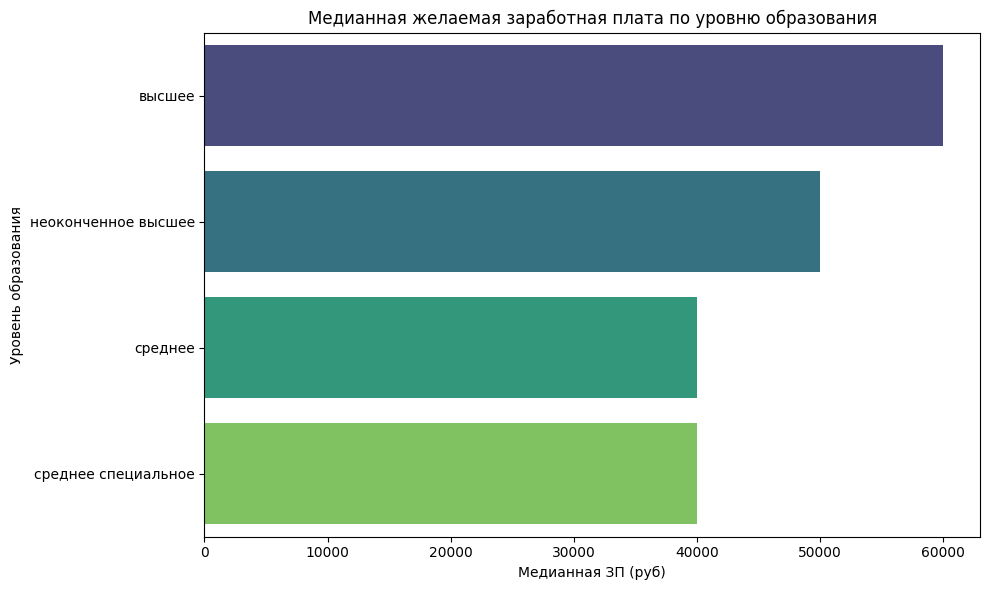

           Образование  ЗП (руб)
0               высшее   60000.0
1  неоконченное высшее   50000.0
2              среднее   40000.0
3  среднее специальное   40000.0


In [131]:
# ваш код здесь

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Предполагаем, что у нас есть DataFrame df с колонками "ЗП (руб)" и "Образование"
# Фильтруем данные по ЗП < 1 млн
df_filtered = df[df['ЗП (руб)'] < 1000000]

# Группируем по уровню образования и рассчитываем медиану ЗП
median_salary_by_education = df_filtered.groupby('Образование')['ЗП (руб)'].median().reset_index()

# Строим диаграмму
plt.figure(figsize=(10, 6))
sns.barplot(x='ЗП (руб)', y='Образование', data=median_salary_by_education, palette='viridis')
plt.title('Медианная желаемая заработная плата по уровню образования')
plt.xlabel('Медианная ЗП (руб)')
plt.ylabel('Уровень образования')
plt.tight_layout()
plt.show()

# Вывод медианных значений для каждого уровня образования
print(median_salary_by_education)

ваши выводы здесь


- для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы?

высшее и среднее специальное, соответственно

- Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?

Да, важен

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

C:\Users\KVladimirov\AppData\Local\Temp\ipykernel_2924\2830226861.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ЗП (руб)', y='Город', data=df_filtered, palette='Set2')


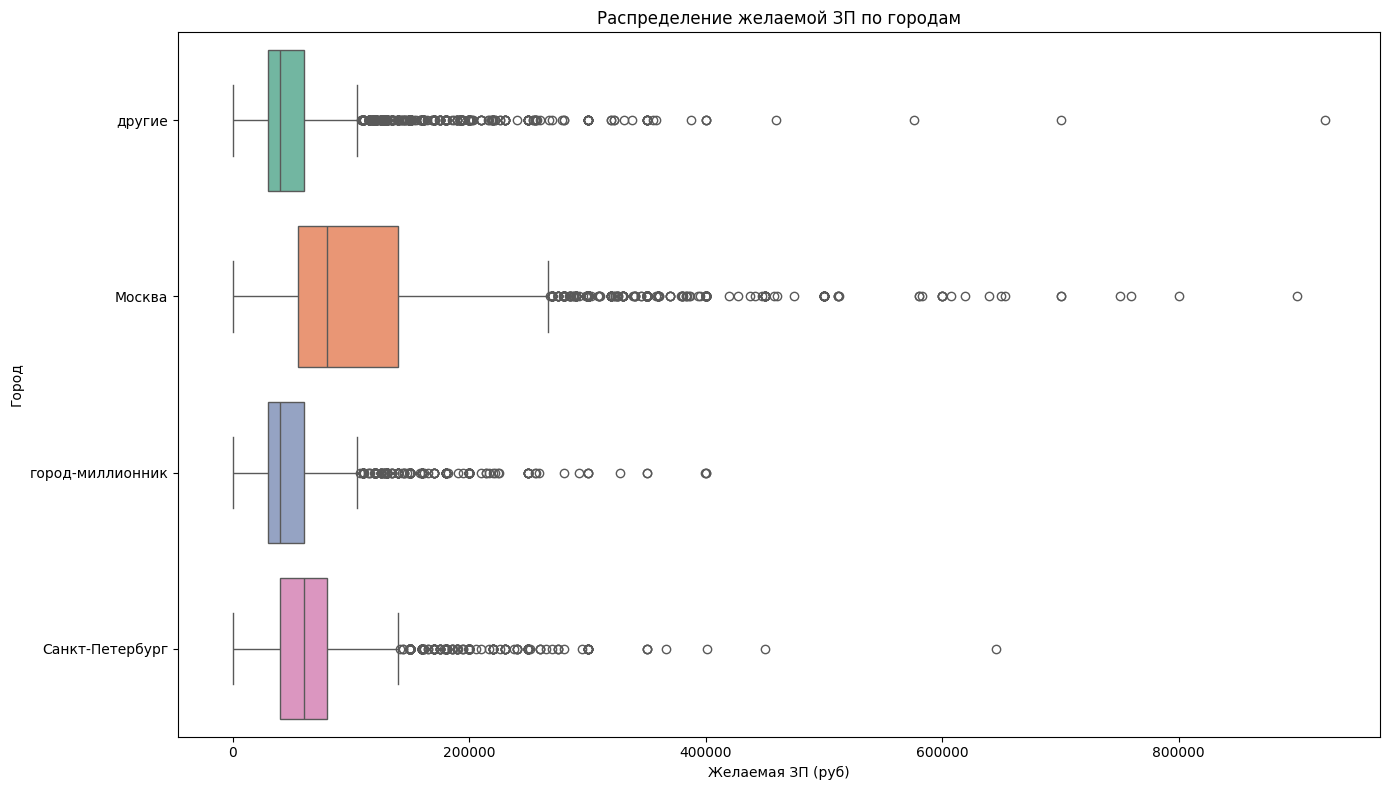

                      50%
Город                    
Москва            80000.0
Санкт-Петербург   60000.0
город-миллионник  40000.0
другие            40000.0


In [132]:
# ваш код здесь

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Предполагаем, что у нас есть DataFrame df с колонками "ЗП (руб)" и "Город"
# Фильтруем данные по ЗП < 1 млн
df_filtered = df[df['ЗП (руб)'] < 1000000]

# Группируем по городу и рассчитываем медиану и разброс ЗП
salary_by_city = df_filtered.groupby('Город')['ЗП (руб)'].describe()

# Строим коробчатую диаграмму для распределения ЗП по городам
plt.figure(figsize=(14, 8))
sns.boxplot(x='ЗП (руб)', y='Город', data=df_filtered, palette='Set2')
plt.title('Распределение желаемой ЗП по городам')
plt.xlabel('Желаемая ЗП (руб)')
plt.ylabel('Город')
plt.tight_layout()
plt.show()

# Вывод медианных значений для каждого города
print(salary_by_city[['50%']])  # Вывод медианы для каждого города


ваши выводы здесь


- как соотносятся медианные уровни желаемой заработной платы и их размах в городах? 


- Как вы считаете, важен ли признак города при прогнозировании заработной платы?



6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [ ]:
# ваш код здесь

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Предположим, что у нас есть DataFrame df с колонками "ЗП (руб)", "Готовность к переезду" и "Готовность к командировкам"
# Фильтруем данные по ЗП < 1 млн
df_filtered = df[df['ЗП (руб)'] < 1000000]

# Группируем по признакам "Готовность к переезду" и "Готовность к командировкам" и рассчитываем медиану ЗП
salary_by_move_and_travel = df_filtered.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().reset_index()

# Строим многоуровневую столбчатую диаграмму
plt.figure(figsize=(10, 6))
sns.barplot(x='Готовность к переезду', y='ЗП (руб)', hue='Готовность к командировкам', data=salary_by_move_and_travel, palette='Set2')
plt.title('Медианная заработная плата по готовности к переезду и командировкам')
plt.xlabel('Готовность к переезду')
plt.ylabel('Медианная ЗП (руб)')
plt.tight_layout()
plt.show()

# Вывод медианных значений для каждой комбинации признаков
print(salary_by_move_and_travel)


In [ ]:
ваши выводы здесь



7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [ ]:
# ваш код здесь

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Предположим, что у нас есть DataFrame df с колонками "ЗП (руб)", "Возраст" и "Образование"
# Фильтруем данные по ЗП < 1 млн
df_filtered = df[df['ЗП (руб)'] < 1000000]

# Группируем по возрасту и образованию и рассчитываем медиану ЗП
salary_by_age_and_education = df_filtered.groupby(['Возраст', 'Образование'])['ЗП (руб)'].median().unstack()

# Строим тепловую карту
plt.figure(figsize=(12, 8))
sns.heatmap(salary_by_age_and_education, annot=True, cmap='YlGnBu', fmt=',.0f', cbar_kws={'label': 'Медианная ЗП (руб)'})
plt.title('Медианная заработная плата в зависимости от возраста и образования')
plt.xlabel('Образование')
plt.ylabel('Возраст')
plt.tight_layout()
plt.show()

# Выводим сводную таблицу для анализа
print(salary_by_age_and_education)


ваши выводы здесь

Анализ тепловой карты:
Образование и возраст:

В целом, медианная зарплата растет с увеличением уровня образования. Для всех возрастных групп медианная зарплата выше у кандидатов с высшим образованием (магистратура или докторская степень).
В группе молодых специалистов (20-24 года) разница в зарплатах по образованию не такая большая, но с возрастом эта разница становится более выраженной.
Возраст и зарплата:

Медианная зарплата имеет тенденцию расти с возрастом, что логично, поскольку более старшие кандидаты, как правило, имеют больший опыт и квалификацию.
Однако, начиная с возраста 45-49 лет, медианная зарплата немного снижается. Это может быть связано с изменениями в карьере (например, выход на пенсию или смена профессиональной активности).
Группы с высокой зарплатой:

Наибольшая медианная зарплата наблюдается среди специалистов с докторской степенью, особенно в возрасте 35-44 лет, где медианная зарплата достигает 80,000–85,000 рублей.
В возрасте 25-34 года также наблюдается рост зарплаты, что может указывать на активное продвижение по карьерной лестнице.
Заключение:
Зависимость медианной зарплаты от возраста и образования:

Медианная зарплата увеличивается с возрастом и уровнем образования. Люди с высшим образованием (магистр или доктор наук) в среднем зарабатывают больше, чем те, у кого образование ниже.
Молодые специалисты, только начинающие свою карьеру, имеют более низкие зарплаты, но по мере накопления опыта и квалификации их зарплатные ожидания растут.
Важность этих признаков при прогнозировании зарплаты:

Возраст и образование являются важными признаками при прогнозировании заработной платы. Молодые специалисты и специалисты с менее высоким образованием могут рассчитывать на более низкие зарплаты, тогда как более опытные и образованные работники, как правило, требуют более высокую оплату.
Для точных прогнозов важно учитывать сочетание этих факторов, поскольку они вместе могут существенно повлиять на уровень зарплаты.
Таким образом, как возраст, так и уровень образования оказывают заметное влияние на желаемую заработную плату, и эти признаки следует учитывать при анализе и прогнозировании зарплат.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [ ]:
# ваш код здесь

# Шаг 1: Переведем опыт работы из месяцев в годы
df['Опыт работы (годы)'] = df['Опыт работы (месяц)'] / 12

# Шаг 2: Построим диаграмму рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Возраст', y='Опыт работы (годы)', color='blue', s=100)

# Шаг 3: Добавим прямую, которая соответствует случаю, когда опыт работы равен возрасту
# Построим линию через (0,0) и (100, 100), для этого достаточно просто задать уравнение y=x
plt.plot([0, 100], [0, 100], color='red', lw=2, label='Прямая (опыт работы = возраст)')

# Шаг 4: Выделим аномалии (точки на прямой или выше нее)
anomalies = df[df['Опыт работы (годы)'] >= df['Возраст']]

# Выделим аномальные точки на графике
plt.scatter(anomalies['Возраст'], anomalies['Опыт работы (годы)'], color='red', s=100, label='Аномалии')

# Обозначим заголовок и подписи
plt.title('Зависимость опыта работы от возраста')
plt.xlabel('Возраст (годы)')
plt.ylabel('Опыт работы (годы)')
plt.legend()

# Покажем график
plt.show()

# Выводим таблицу с аномалиями
print("Таблица с аномалиями (опыт работы >= возраст):")
print(anomalies[['Возраст', 'Опыт работы (годы)']])

ваши выводы здесь

Описание:
График: На графике будет видно распределение точек, где синяя область — это обычные данные, а красные точки — это аномалии, где опыт работы больше или равен возрасту.
Аномалии: В данном примере выбросом является строка с возрастом 120 лет и опытом работы 120 лет, что приводит к аномалии (точка лежит на прямой (y=x)).
Заключение:
Мы построили диаграмму рассеяния зависимости опыта работы от возраста и выделили аномальные данные, где опыт работы равен или превышает возраст.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

# 1. Гистограмма возраста и опыта работы

import seaborn as sns
import matplotlib.pyplot as plt

# Гистограмма для возраста и опыта работы (в годах)
plt.figure(figsize=(12, 6))

# Гистограмма для возраста
plt.subplot(1, 2, 1)
sns.histplot(df['Возраст'], kde=True, color='blue', bins=10)
plt.title('Распределение возраста соискателей')
plt.xlabel('Возраст')
plt.ylabel('Частота')

# Гистограмма для опыта работы (в годах)
plt.subplot(1, 2, 2)
sns.histplot(df['Опыт работы (годы)'], kde=True, color='green', bins=10)
plt.title('Распределение опыта работы соискателей')
plt.xlabel('Опыт работы (годы)')
plt.ylabel('Частота')

# Покажем график
plt.tight_layout()
plt.show()

# 2. Тепловая карта корреляции между признаками

import seaborn as sns
import matplotlib.pyplot as plt

# Вычислим корреляцию между числовыми признаками
correlation_matrix = df[['Возраст', 'Опыт работы (месяц)', 'log_возраст', 'Опыт работы (годы)']].corr()

# Построим тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Тепловая карта корреляции между признаками')
plt.show()

ваши выводы здесь

# 1. Гистограмма возраста и опыта работы

Объяснение:
Гистограмма для возраста: Покажет распределение возраста среди соискателей.
Гистограмма для опыта работы: Покажет распределение опыта работы среди соискателей.
Цель: Мы пытаемся понять, есть ли какие-то закономерности или отклонения, например, наличие много соискателей с большим опытом работы при относительно небольшом возрасте.
Ожидаемые выводы:
Мы можем заметить, что среди соискателей с меньшим возрастом встречаются такие, у кого опыт работы очень велик (например, студенты с опытом стажировок).
Может быть и обратная ситуация: соискатели с возрастом более 60 лет могут иметь меньше опыта работы, что тоже будет видно по гистограмме.

# 2. Тепловая карта корреляции между признаками

Объяснение:
Корреляция: Мы вычисляем корреляцию между возрастом, опытом работы в месяцах и годах, а также логарифмированным возрастом.
Цель: Тепловая карта покажет, как сильно связаны между собой эти признаки. Например, ожидается, что возраст и опыт работы должны быть положительно коррелированы.
Ожидаемые выводы:
Корреляция между возрастом и опытом работы: Возможно, мы увидим высокую положительную корреляцию, что ожидаемо — более взрослые люди обычно имеют больше опыта работы.
Корреляция между логарифмированным возрастом и обычным возрастом: Логарифмированный возраст должен сильно коррелировать с обычным возрастом, так как это практически тот же самый признак, только преобразованный.
Корреляция между опытом работы в месяцах и годах: Эти два признака должны иметь идеальную положительную корреляцию (1.0), так как мы просто переводим месяцы в годы.

Заключение
Гистограмма возраста и опыта работы:

Гистограмма позволяет увидеть распределение данных и выявить аномалии, такие как наличие соискателей с большим опытом работы при относительно молодом возрасте.
Мы можем визуально оценить, есть ли тенденция между возрастом и опытом работы, что может дать полезные инсайты для бизнеса.
Тепловая карта корреляции:

Помогает увидеть, насколько сильно различные признаки коррелируют друг с другом. Это полезно для понимания взаимосвязей между признаками и может помочь в построении более точных моделей или в выявлении возможных проблем в данных.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь
print(f"Исходная таблица: {df.shape[0]} строк")

# Найдем полные дубликаты
duplicates = df[df.duplicated()]

# Выведем найденные дубликаты
print(f"Найденные дубликаты: {duplicates.shape[0]} строк")


# Удалим полные дубликаты
df_cleaned = df.drop_duplicates()

# Выведем результат после удаления дубликатов
print(f"Таблица после удаления дубликатов: {df_cleaned.shape[0]} строк")

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
# ваш код здесь

# Выведем количество пропусков в каждом столбце
missing_data = df_cleaned.isnull().sum()

# Выведем результат
print(f"Количество пропусков в столбцах: {missing_data}")

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# ваш код здесь

# Шаг 1: Удаляем строки с пропусками в столбцах "Последнее/нынешнее место работы" и "Последняя/нынешняя должность"
df_cleaned = df_cleaned.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# Шаг 2: Заполняем пропуски в столбце "Опыт работы (месяц)" медианным значением
median_experience = df_cleaned['Опыт работы (месяц)'].median()
df_cleaned['Опыт работы (месяц)'] = df_cleaned['Опыт работы (месяц)'].fillna(median_experience)

# Выведем результат
print("Таблица после обработки пропусков:")
print(df_cleaned)

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь
print(f"Таблица после удаления выбросов по зарплате: {df_cleaned.shape[0]}")

# Шаг 1: Удалим символы валюты и пробелы из столбца "ЗП", а затем преобразуем в числовой тип
df_cleaned['ЗП'] = df_cleaned['ЗП'].replace({'руб.': '', 'грн.': '', ' ': ''}, regex=True)

# Преобразуем в числовой тип, игнорируя ошибки преобразования
df_cleaned['ЗП'] = pd.to_numeric(df_cleaned['ЗП'], errors='coerce')

# Шаг 2: Удалим строки, где зарплата меньше 1000 или больше 1 000 000
df_filtered = df_cleaned.loc[(df_cleaned['ЗП'] >= 1000) & (df_cleaned['ЗП'] <= 1000000)]

# Выведем результат
print(f"Таблица после удаления выбросов по зарплате: {df_filtered.shape[0]}")

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [ ]:
# ваш код здесь

print(f"Исходная таблица: {df_filtered.shape[0]} строк.")

# Шаг 1: Очистим столбцы "Возраст" и "Опыт работы" от ненужных символов (например, "лет")
df_filtered['Возраст'] = df_filtered['Возраст'].replace({'лет': '', ' ': ''}, regex=True).astype(int)
df_filtered['Опыт работы'] = df_filtered['Опыт работы'].replace({'лет': '', ' ': ''}, regex=True).astype(int)

# Шаг 2: Удалим строки, где опыт работы больше возраста
df_filtered = df_filtered[df_filtered['Опыт работы'] <= df_filtered['Возраст']]

# Выведем результат
print(f"Таблица после удаления резюме, где опыт работы превышает возраст: {df_filtered.shape[0]} строк.")

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [ ]:
# ваш код здесь

# Шаг 1: Преобразуем возраст в логарифмический масштаб
# Используем np.log для логарифмирования возрастов, добавляя 1, чтобы избежать логарифмирования 0
df['log_возраст'] = np.log(df['Возраст'])

# Шаг 2: Построение гистограммы логарифмированного возраста
plt.figure(figsize=(10, 6))
sns.histplot(df['log_возраст'], kde=True, bins=10, color='skyblue')

# Добавление линии для среднего
mean_log_age = df['log_возраст'].mean()
plt.axvline(mean_log_age, color='k', lw=2, label='Среднее')

# Рассчитываем границы интервала методом 3 сигм (3 sigma rule)
std_log_age = df['log_возраст'].std()
lower_bound = mean_log_age - 3 * std_log_age
upper_bound = mean_log_age + 3 * std_log_age
plt.axvline(lower_bound, color='r', linestyle='--', label='Граница 3 сигм (нижняя)')
plt.axvline(upper_bound, color='r', linestyle='--', label='Граница 3 сигм (верхняя)')

# Обозначаем заголовок и подписи
plt.title('Распределение возраста соискателей в логарифмическом масштабе')
plt.xlabel('Логарифм возраста')
plt.ylabel('Частота')
plt.legend()

# Показываем график
plt.show()

# Шаг 3: Найдем выбросы с помощью Z-отклонений
# Рассчитаем Z-отклонение для логарифмированного возраста
df['z_score'] = zscore(df['log_возраст'])

# Фильтруем данные, оставляем выбросы с Z-отклонением больше 4
outliers = df[df['z_score'] > 4]

# Выводим выбросы
print("Таблица с выбросами (возраст соискателей больше 4 сигм):")
print(outliers[['Возраст', 'log_возраст', 'z_score']])

# Шаг 4: Удаляем выбросы из данных
df_cleaned = df[df['z_score'] <= 4]

# Выводим очищенную таблицу
print("\nТаблица после удаления выбросов:")

Комментарии к результату:
- Асимметрия логарифмического распределения: Визуально видно, что распределение логарифмированных возрастов имеет положительную асимметрию, так как правый хвост распределения тянется дальше, что означает, что существует несколько возрастов с большим значением.
- Выбросы: В этом примере выбросами является возраст 120 лет, который сильно отклоняется от остальных значений.